In [1]:
# in this notebook, we are testing out some new math to make the model a bit more self-consistent and logical
# and making sure it still runs to steady state in a reasonable time when those changes are made
# see notes from 3/8/23 in red, gridded notebook for details on changes
# and/or compare to "default.ipynb"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create a profile
dx = 500
x = np.arange(0, 50000, dx)
x_node = x + (dx/2)

# add some elevation
Hstar = 0.5 # depth decay
etab = np.zeros(len(x)) # bedrock elevation
etab[:] = np.linspace(1, 0.1, len(x)) # need to start with slight bedrock slope
H = Hstar + np.zeros(len(x)) # alluvium thickness
eta = etab + H # topography

In [4]:
# define constants and other parameters
K = 1e-6 # erodibility
beta = 0.000005 # abradability
r = 5. # runoff rate
U = 0.0001 # uplift or baselevel fall rate
I = 0.01 # intermittency
phi = 0.1 # porosity
D = 0.01 # grain size
gamma = 0.5 # fraction plucked that becomes coarse

kqs = 0.041 # sed transport coeff
kxb = 25 # valley width coeff
Pxb = 1./5. # valley width exp
kb = 8.3e-8 # channel width coeff

B_valley = kxb * (x_node**Pxb) # valley width
# Q = (r * kxb * x_node**(1 + Pxb))/(1 + Pxb) # discharge
A = (1./3.) * (x**2)
Q = r * A

In [5]:
def model(x, dx, x_node,
          K, beta, gamma,
          D, phi, Hstar,
          kb, kqs, I, r, U,
          etab, H, eta,
          B_valley, Q,
          num_steps = 1):
    
    q = Q/B_valley
    dt = 15
    
    run_duration = dt * num_steps
    cum_time = 0.0
    
    Qs = np.zeros(len(x))
    qs = np.zeros(len(x))
    Eb_p = np.zeros(len(x))
    Eb_a = np.zeros(len(x))
    Eb = np.zeros(len(x))
    Eh = np.zeros(len(x))
    E = np.zeros(len(x))
    ql = np.zeros(len(x)) # lateral sediment supply
    
    H[-1] = 0
    E[-1] = U
    q[0] = 0
    Qs[0] = 0
    
    while cum_time < run_duration:
        
        # drop baselevel
        eta[-1] -= U * dt
        
        # set boundary conditions
        etab[-1] = eta[-1]
        
        # calc slope
        S = -np.diff(eta)/dx
        
        # calc bed exposure
        alpha = np.exp(-H/Hstar)
        
        # calc sed transport
        Qs[1:] = kqs * I * Q[1:] * S**(7./6.) * (1 - alpha[:-1])
        qs[1:] = Qs[1:] / B_valley[1:]
        
        # calc bedrock erosion
        Eb_p[:-1] = K * Q[1:] * S**(7./6.) * alpha[:-1] * I
        Eb_a[:-1] = beta * Qs[1:] * alpha[:-1]
        Eb[:-1] = (Eb_p[:-1] + Eb_a[:-1]) / B_valley[:-1]
        
        # calc lateral flux
        ql[:-1] = ((Eb[:-1] * gamma)/beta) * (1 - np.exp(-beta * x[1:]/3))
        
        # calc grain attrition
        atr = Qs * beta
        
        # calc sediment erosion rate
        Eh[:-1] = 1/((1 - phi) * B_valley[:-1]) * (np.diff(Qs)/dx + atr[1:] - (Eb_p[:-1]*gamma) - ql[:-1])
        
        # calc total erosion rate
        E[:-1] = Eb[:-1] + Eh[:-1]
        
        # update topography
        etab[:-1] -= Eb[:-1] * dt
        H[:-1] -= Eh[:-1] * dt
        H[H<0] = 0
        eta[:-1] = etab[:-1] + H[:-1]
        
        # update elapsed time
        cum_time += dt
        
    print(cum_time)
        
    return (dt, S, q, alpha, Qs, qs, Eb_p, Eb_a, Eb, ql, atr, Eh, E, etab, H, eta)

In [6]:
#now write a test
num_steps = 50000000

test_run = [x, dx, x_node, 
            K, beta, gamma,
            D, phi, Hstar,
            kb, kqs, I, r, U,
            etab, H, eta,
            B_valley, Q,
            num_steps]

# and run it
(dt, S, q, alpha, Qs, qs, Eb_p, Eb_a, Eb, ql, atr, Eh, E, etab, H, eta) = model(*test_run)

750000000.0


In [7]:
Eb

array([9.99999998e-05, 9.99999999e-05, 9.99999999e-05, 9.99999999e-05,
       9.99999999e-05, 9.99999999e-05, 9.99999999e-05, 9.99999999e-05,
       9.99999999e-05, 9.99999999e-05, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
      

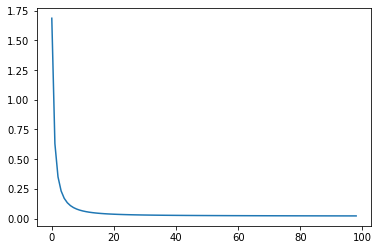

In [8]:
plt.plot(S)

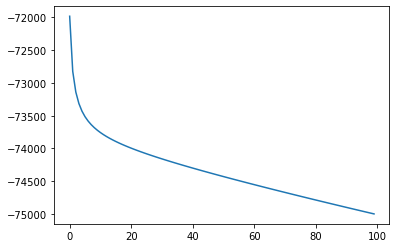

In [9]:
plt.plot(eta)

In [10]:
S[-1]

0.02205571231248905

In [11]:
eta

array([-71980.84833083, -72823.4880397 , -73138.50419362, -73313.67755219,
       -73429.83612782, -73514.92865422, -73581.41392348, -73635.76793236,
       -73681.72369467, -73721.59952605, -73756.91845824, -73788.72599462,
       -73817.76558943, -73844.58142408, -73869.58156235, -73893.07833935,
       -73915.31507607, -73936.48426541, -73956.74026404, -73976.20834402,
       -73994.99127254, -74013.17417627, -74030.82819234, -74048.01324591,
       -74064.78018948, -74081.17246904, -74097.22743508, -74112.97738393,
       -74128.45039193, -74143.67098927, -74158.66070821, -74173.43853223,
       -74188.02126656, -74202.42384553, -74216.65958907, -74230.74041799,
       -74244.67703545, -74258.47908077, -74272.15526037, -74285.71345967,
       -74299.16083922, -74312.50391745, -74325.74864234, -74338.90045355,
       -74351.96433664, -74364.94487029, -74377.84626786, -74390.67241379,
       -74403.42689574, -74416.11303304, -74428.7339018 , -74441.29235733,
       -74453.79105401, -

In [12]:
eta_adj = eta - eta[-1]

In [13]:
eta_adj

array([3018.55161238, 2175.91190351, 1860.89574958, 1685.72239102,
       1569.56381538, 1484.47128898, 1417.98601973, 1363.63201084,
       1317.67624853, 1277.80041715, 1242.48148497, 1210.67394859,
       1181.63435378, 1154.81851913, 1129.81838085, 1106.32160385,
       1084.08486713, 1062.91567779, 1042.65967916, 1023.19159918,
       1004.40867067,  986.22576694,  968.57175087,  951.38669729,
        934.61975372,  918.22747417,  902.17250812,  886.42255928,
        870.94955128,  855.72895393,  840.739235  ,  825.96141097,
        811.37867664,  796.97609768,  782.74035413,  768.65952522,
        754.72290776,  740.92086243,  727.24468284,  713.68648353,
        700.23910398,  686.89602575,  673.65130087,  660.49948965,
        647.43560657,  634.45507291,  621.55367534,  608.72752942,
        595.97304746,  583.28691016,  570.6660414 ,  558.10758588,
        545.6088892 ,  533.1674801 ,  520.78105456,  508.44746152,
        496.16469008,  483.93085798,  471.74420122,  459.60306

In [14]:
ql

array([0.00832986, 0.01665279, 0.02496878, 0.03327784, 0.04157998,
       0.04987521, 0.05816352, 0.06644494, 0.07471945, 0.08298707,
       0.09124781, 0.09950166, 0.10774864, 0.11598875, 0.124222  ,
       0.13244838, 0.14066792, 0.1488806 , 0.15708645, 0.16528546,
       0.17347764, 0.181663  , 0.18984154, 0.19801327, 0.20617819,
       0.21433631, 0.22248763, 0.23063216, 0.23876991, 0.24690088,
       0.25502508, 0.26314251, 0.27125317, 0.27935709, 0.28745425,
       0.29554466, 0.30362834, 0.31170529, 0.3197755 , 0.327839  ,
       0.33589577, 0.34394584, 0.3519892 , 0.36002586, 0.36805582,
       0.3760791 , 0.38409569, 0.39210561, 0.40010885, 0.40810543,
       0.41609534, 0.42407861, 0.43205522, 0.44002518, 0.44798851,
       0.4559452 , 0.46389527, 0.47183871, 0.47977554, 0.48770575,
       0.49562936, 0.50354637, 0.51145679, 0.51936061, 0.52725786,
       0.53514852, 0.54303261, 0.55091013, 0.5587811 , 0.5666455 ,
       0.57450336, 0.58235466, 0.59019943, 0.59803767, 0.60586

In [15]:
Eb

array([9.99999998e-05, 9.99999999e-05, 9.99999999e-05, 9.99999999e-05,
       9.99999999e-05, 9.99999999e-05, 9.99999999e-05, 9.99999999e-05,
       9.99999999e-05, 9.99999999e-05, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
      

In [16]:
ql/B_valley

array([0.00011044, 0.00017723, 0.00023992, 0.00029896, 0.00035523,
       0.00040933, 0.00046167, 0.00051253, 0.0005621 , 0.00061056,
       0.00065804, 0.00070462, 0.00075041, 0.00079545, 0.00083983,
       0.00088358, 0.00092675, 0.00096939, 0.00101151, 0.00105316,
       0.00109436, 0.00113513, 0.00117549, 0.00121548, 0.00125509,
       0.00129436, 0.00133328, 0.00137189, 0.00141019, 0.00144819,
       0.0014859 , 0.00152333, 0.0015605 , 0.00159741, 0.00163407,
       0.00167049, 0.00170667, 0.00174262, 0.00177836, 0.00181387,
       0.00184918, 0.00188428, 0.00191919, 0.0019539 , 0.00198842,
       0.00202275, 0.00205691, 0.00209089, 0.00212469, 0.00215833,
       0.0021918 , 0.00222511, 0.00225826, 0.00229125, 0.00232409,
       0.00235679, 0.00238933, 0.00242173, 0.00245399, 0.00248611,
       0.00251809, 0.00254994, 0.00258166, 0.00261325, 0.0026447 ,
       0.00267604, 0.00270725, 0.00273833, 0.0027693 , 0.00280014,
       0.00283088, 0.00286149, 0.00289199, 0.00292238, 0.00295

In [17]:
# save csv files

# np.savetxt('elevation csv files/eta_default.csv', eta_adj, delimiter = ',')
# np.savetxt('alpha csv files/alpha_default.csv', alpha, delimiter = ',')
# np.savetxt('slope csv files/slope_default.csv', S, delimiter = ',')

In [18]:
eta_adj = eta - eta[-1]

In [19]:
# import elev data for default run
default = np.genfromtxt('elevation csv files/eta_exp_4.csv', delimiter=',')

In [20]:
default[0]

342.0084289986389

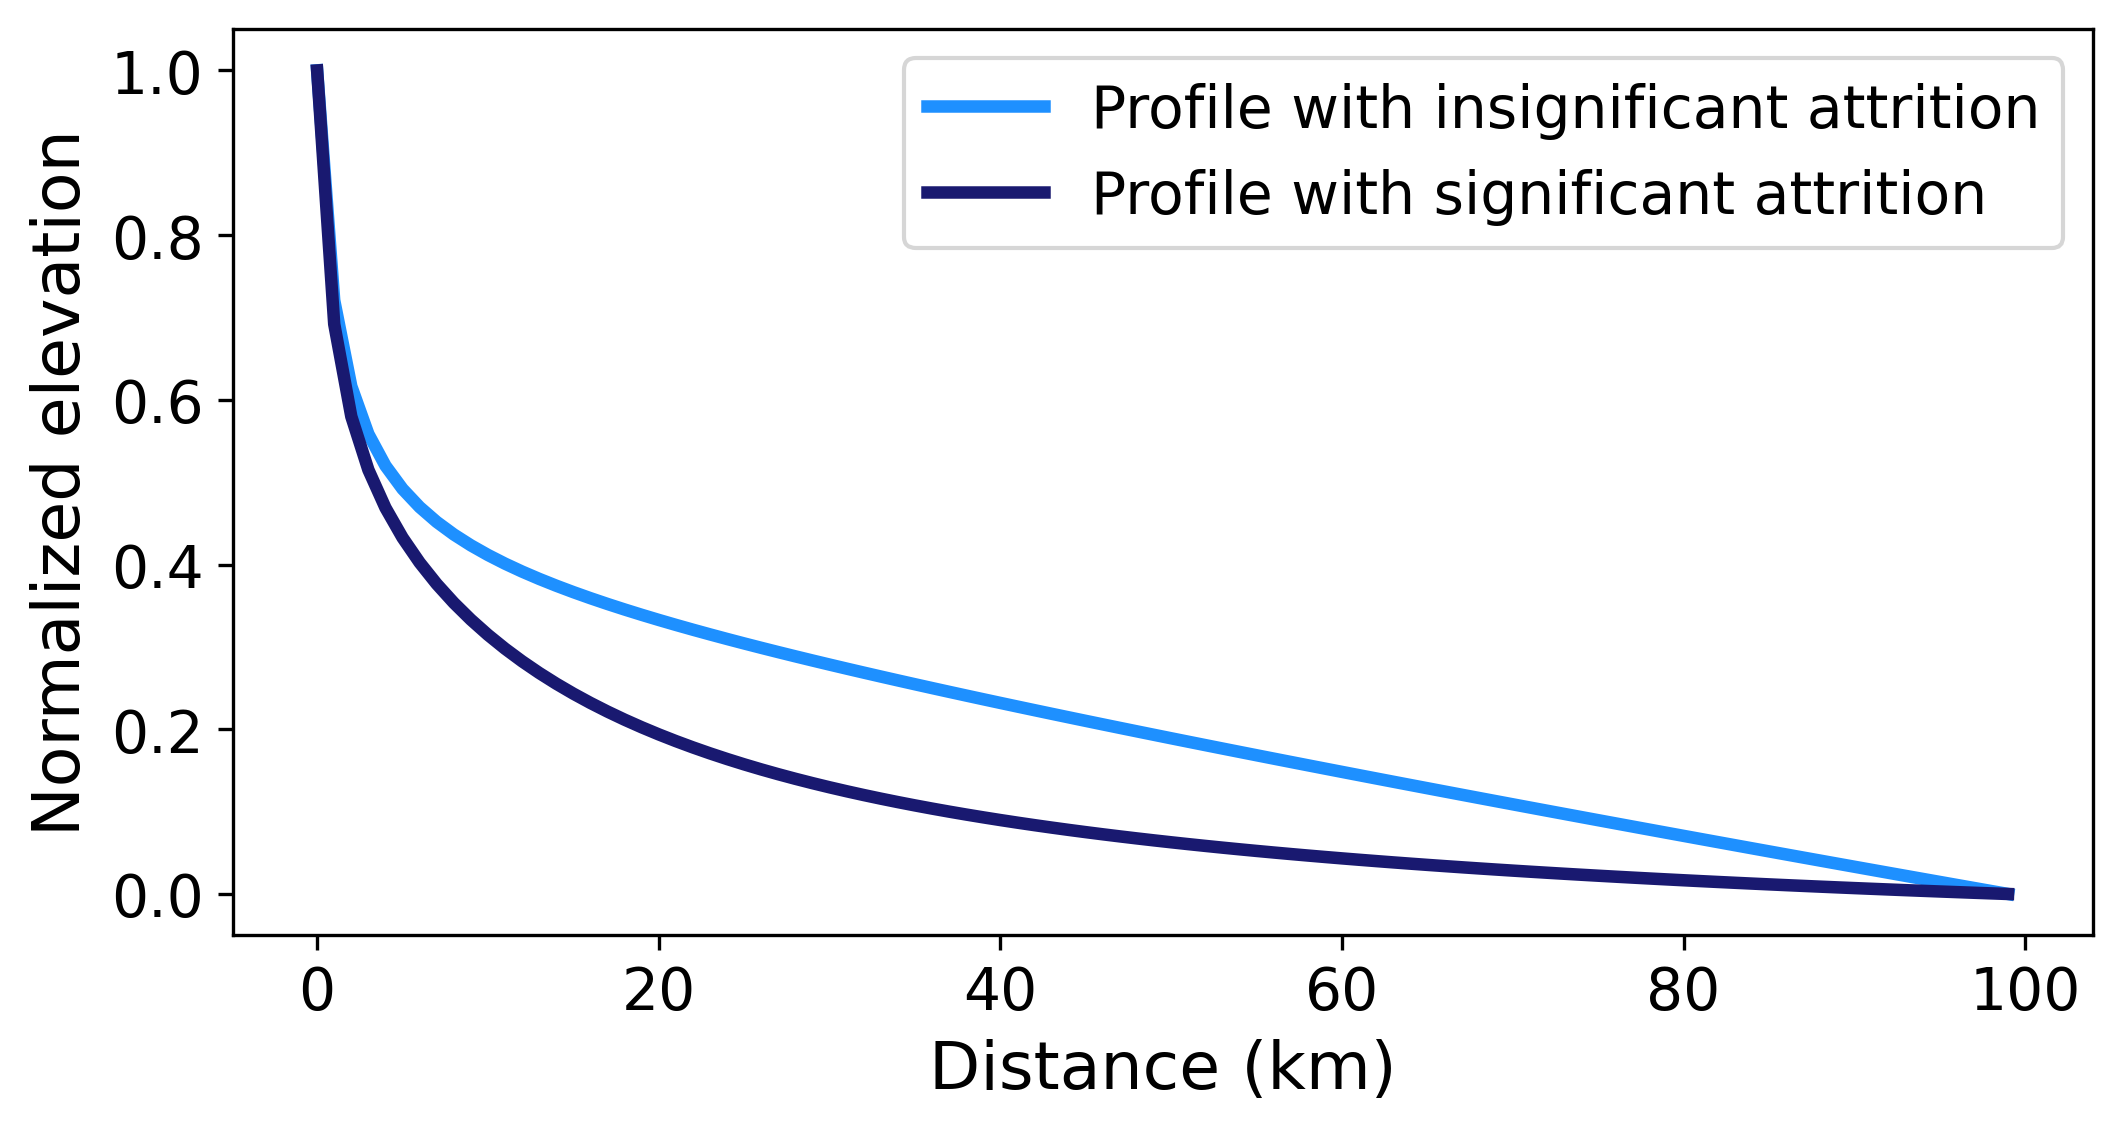

In [21]:
plt.rcParams['figure.dpi'] = 300
# plt.rcParams['savefig.dpi'] = 300

plt.figure(figsize = (8, 4))

plt.plot(x/500, eta_adj/3018, label = 'Profile with insignificant attrition', color = 'dodgerblue', linewidth = 3)
plt.plot(x/500, default/342, label = 'Profile with significant attrition', color = 'midnightblue', linewidth = 3)
plt.xlabel('Distance (km)', fontsize = 16)
plt.ylabel('Normalized elevation', fontsize = 16)
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('low attrition profile 2.pdf', transparent = True, bbox_inches='tight')